In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializing the K medoids
def init_medoids(X, k):
    from numpy.random import choice
    #from numpy.random import seed
    
    #seed(1)
    samples = choice(len(X), k, replace=False)
    return X[samples, :]

In [3]:
#Computing the distance
#Manhattan distance: ord=1; Euclidean distance: ord=2
def distances(X, medoids):
    m = len(X)
    if len(medoids.shape) == 1:
        medoids = medoids.reshape(1, len(medoids))
    k = len(medoids)
    S = np.empty((m, k))
    for i in range(m):
        d = np.linalg.norm(X[i,:]-medoids, ord=2, axis=1)
        S[i, :] = d**2
    return S

In [4]:
#Assign points to clusters
def assign_cluster(S):
    return np.argmin(S, axis=1)


In [5]:
#Update the medoids
import scipy.spatial.distance
def update_medoids(X, medoids):
    S = distances(X, medoids)
    labels = assign_cluster(S)
    new_medoids = medoids
    assign_points = np.column_stack((X, labels))
    
    for i in set(labels):
        cluster_points = assign_points[assign_points[:, -1]==i][:, :-1]
        if len(medoids[i].shape) == 1:
            a = medoids[i].reshape(1, len(medoids[i]))
        sum_dis = np.sum(scipy.spatial.distance.cdist(cluster_points, a, 'euclidean'))
        
        for point in cluster_points:
            if len(point.shape) == 1:
                b = point.reshape(1, len(point))
            new_dis = np.sum(scipy.spatial.distance.cdist(cluster_points, b, 'euclidean'))
            
            if new_dis < sum_dis:
                sum_dis = new_dis
                new_medoids[i] = point
    
    return new_medoids


In [6]:
#within-cluster-sum-of-squares
def WCSS(S):
    return np.sum(np.amin(S, axis=1))

In [7]:
#Implement K-medoids algorithm
def has_converged(old_medoids, new_medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in new_medoids])

def k_medoids(X, k):
    converged = False
    labels = np.zeros(len(X))
    i = 1
    medoids = init_medoids(X, k)
    while (not converged):
        old_medoids = medoids.copy()
        S = distances(X, medoids)
        labels = assign_cluster(S)
        medoids = update_medoids(X, medoids)
        converged = has_converged(old_medoids, medoids)
        print('iteration', i, 'WCSS =', WCSS(S))
        i += 1
    return labels, medoids, i

Shape of the matrix of the image: (225, 225, 3)
iteration 1 WCSS = 23654945.0
iteration 2 WCSS = 11870870.0
iteration 3 WCSS = 11493659.0
iteration 4 WCSS = 11460458.0
iteration 5 WCSS = 11498607.0
iteration 6 WCSS = 11449756.0
iteration 7 WCSS = 11440292.0
iteration 8 WCSS = 11430436.0
iteration 9 WCSS = 11429282.0
iteration 10 WCSS = 11408214.0
iteration 11 WCSS = 11384978.0


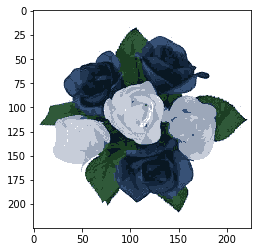

In [8]:
#Image compression using K-medoids clustering
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

img_array = np.array(Image.open('download.jpg'), dtype='int32')
r, c, l = img_array.shape
print('Shape of the matrix of the image:', img_array.shape)

img_reshaped = np.reshape(img_array, (r*c, l), order='C')

k = 16
labels, medoids, iterations = k_medoids(img_reshaped, k)

#ind = np.column_stack((img_reshaped, labels))
img_clustered = np.array([medoids[i] for i in labels])
img_disp = np.reshape(img_clustered, (r, c, l), order='C')

def display_image(array):
    array = array.astype(dtype='uint8')
    img = Image.fromarray(array, 'RGB')
    imshow(np.asarray(img))
display_image(img_disp)
